# Classification in Python

Classification is the process of taking a data set and dividing it into a number of clusters or groups. There are several approaches to classification. Naive Bayes classifier assumes that the categories are not interrelated, and classifies into two or more categories.

When there are continuous variables which together decide the nature of clusters in a data set, we can use k-Means clustering algorithm.

In the following example, we will use k-means clustering to evaluate a data set and divide it into multiple categories. We will now import some data from projects, which have project spend and project delay data. 

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We use the Pandas library for creating and manipulating data frames. Further, we can import Matplotlib also, since it is used by Pandas to render plots.

In [222]:
dataset = pd.read_csv("dataset.csv")
print dataset.head()

print "\nDataset has an index column which needs to be removed.\n"

del dataset["Unnamed: 0"] #Removing an index column
print dataset.head()

   Unnamed: 0  project_delay_penalty ($k)  project_spend ($m)
0           0                        2.70                4.53
1           1                        3.56                4.55
2           2                        2.89                5.11
3           3                        3.29                5.26
4           4                        2.03                5.02

Dataset has an index column which needs to be removed.

   project_delay_penalty ($k)  project_spend ($m)
0                        2.70                4.53
1                        3.56                4.55
2                        2.89                5.11
3                        3.29                5.26
4                        2.03                5.02


We now have the two variables based on which we have to determine whether there is a need for classification or regression. By plotting the data, we can get a sense of how the data is behaving, and what approach is best.

* Constructing a scatter plot of the variables can reveal patterns
* The scatter diagram can also reveal outliers, unusual combination of values, etc.
* Once we have established the appropriate learning approach, we can construct an algorithm for this

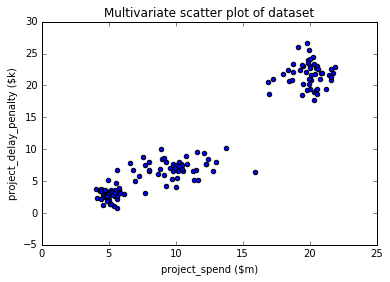

In [216]:
dataset.plot(x = "project_spend ($m)", y = "project_delay_penalty ($k)",kind ="scatter", title="Multivariate scatter plot of dataset")

plt.show()

From the above figure:
* There seem to be 3 categories in the data
* One category is clearly differentiated from the others

In [203]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

km.fit(dataset)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [223]:
labels = km.predict(dataset)

## K-Means as Unsupervised Learning

The predict() method within the KMeans object allows us to predict a set of label for each tuple of entries. Effectively, the first x and first y values are taken as a pair, and assigned a label based on a distance function. Since there is no explicit training set here, this kind of learning is called "Unsupervised learning".


In [205]:
print labels, np.shape(dataset)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] (150, 2)


## Visualizing the clusters in the data

We can pass the labels predicted above to the plot methods, as a colour variable. This allows us to colour the clusters based on the label they've been assigned.

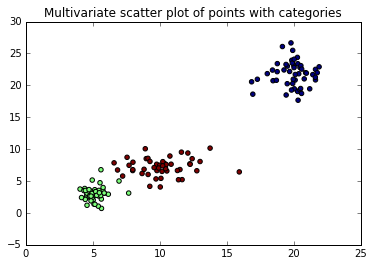

In [206]:
plt.scatter(x = dataset["project_spend ($m)"], y = dataset["project_delay_penalty ($k)"], c = labels)
plt.title("Multivariate scatter plot of points with categories")

In [207]:
newdataset = pd.read_csv("newdataset.csv")

In [208]:
del newdataset["Unnamed: 0"]
newdataset.head()

,project_delay_penalty ($k),project_spend ($m)
0,3.96,5.75
1,2.74,5.24
2,4.73,4.64
3,3.48,5.05
4,3.44,5.66


In [209]:
truelabels = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]
truelabels = np.asarray(truelabels) #Converting a regular list to a Numpy array

newlabels = km.predict(newdataset)
print truelabels

[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]


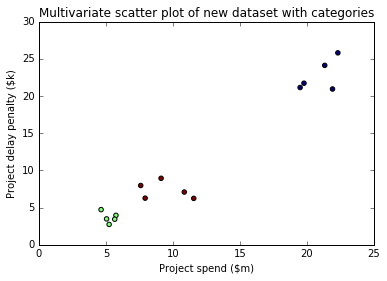

In [210]:
plt.scatter(x = newdataset["project_spend ($m)"], y = newdataset["project_delay_penalty ($k)"], c = newlabels)
plt.xlabel("Project spend ($m)")
plt.ylabel("Project delay penalty ($k)")
plt.title("Multivariate scatter plot of new dataset with categories")

In [211]:
from sklearn.metrics import accuracy_score, confusion_matrix

print np.shape(truelabels), np.shape(newlabels)

accuracy_score(truelabels, newlabels)

(15,) (15,)


0.66666666666666663

In [212]:
confusion_matrix(truelabels, newlabels)

array([[0, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 5, 0],
       [5, 0, 0, 0]])

In [213]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(truelabels, newlabels)

1.0